In [1]:
# import libraries
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## Normally distributed noise
# simulation details
srate = 100 # sampling rate
time = np.arange(-1, 2, 1/srate) # time vector
pnts = len(time) # number of time points

# frequencies for the power spectrum
hz = np.linspace(0, srate/2, int(np.floor(pnts/2)+1))

# noise parameters
stretch = 3 # stretch factor
shift = 0 # shift factor

# optional : fix the random number generator state
# np.random.seed(123)

# generate random data
noise = stretch * np.random.randn(1, pnts) + shift


In [7]:
np.histogram(noise, 100)

(array([ 1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  4,  0,  4,
         2,  2,  1,  0,  0,  5,  3,  4,  3,  3,  2,  1,  6,  5,  6,  1,  1,
         4,  7,  0, 14, 10,  7,  8,  8, 11,  9,  6,  8,  5, 10,  7, 10, 13,
         6,  4,  4, 10,  7,  4,  5,  4, 10,  4,  1,  5,  6,  2,  1,  5,  1,
         5,  1,  1,  3,  2,  2,  1,  4,  1,  0,  1,  1,  0,  1,  0,  0,  0,
         0,  0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1]),
 array([-8.60622604, -8.42265092, -8.2390758 , -8.05550068, -7.87192555,
        -7.68835043, -7.50477531, -7.32120019, -7.13762507, -6.95404995,
        -6.77047482, -6.5868997 , -6.40332458, -6.21974946, -6.03617434,
        -5.85259922, -5.66902409, -5.48544897, -5.30187385, -5.11829873,
        -4.93472361, -4.75114849, -4.56757337, -4.38399824, -4.20042312,
        -4.016848  , -3.83327288, -3.64969776, -3.46612264, -3.28254751,
        -3.09897239, -2.91539727, -2.73182215, -2.54824703, -2.36467191,
        -2.18109679, -1.99752166, -1.81

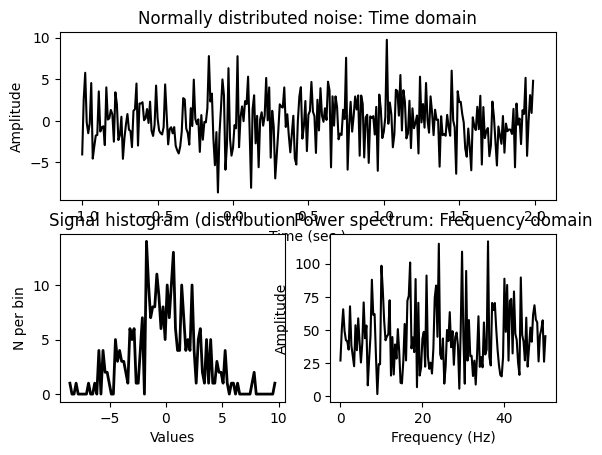

In [11]:
plt.subplot(211)
plt.plot(time, noise[0,:], 'k')
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Normally distributed noise: Time domain')

plt.subplot(223)
y, x = np.histogram(noise, 100)
x = (x[:-1] + x[1:]) / 2
plt.plot(x, y, 'k', linewidth=2)
plt.xlabel('Values')
plt.ylabel('N per bin')
plt.title('Signal histogram (distribution')

plt.subplot(224)
amp = np.abs(np.fft.fft(noise, axis=1))
amp[1:, :] = 2*amp[1:, :]
plt.plot(hz, amp[0, 0:len(hz)], 'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Power spectrum: Frequency domain')

plt.show()